<a href="https://colab.research.google.com/github/atikhasan007/-Natural-Language-Processing-with-spaCy-and-TextBlob/blob/main/Lab-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means and DBScan Cluster Analysis Practice


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plotter
from sklearn.cluster import KMeans
import pandas as pd

In [ ]:
dataset_info = [
    ("Rafiq", "Interstellar", 4, "Sci-Fi"),
    ("Mitu", "The_Godfather", 5, "Crime"),
    ("Hasib", "Joker", 3, "Thriller"),
    ("Rashida", "Frozen", 4, "Animation"),
    ("Tanvir", "The_Dark_Knight", 5, "Action"),
    ("Lubna", "Coco", 4, "Family"),
    ("Sharmin", "Parasite", 5, "Drama"),
]


In [ ]:
cluster_frame= pd.DataFrame(dataset_info,columns=["Name","Movie","Rating","genre"])
print(cluster_frame)

      Name            Movie  Rating      genre
0    Rafiq     Interstellar       4     Sci-Fi
1     Mitu    The_Godfather       5      Crime
2    Hasib            Joker       3   Thriller
3  Rashida           Frozen       4  Animation
4   Tanvir  The_Dark_Knight       5     Action
5    Lubna             Coco       4     Family
6  Sharmin         Parasite       5      Drama


In [ ]:
#Create bipartie graph
B = nx.Graph()
for person, movie, rating, genre in dataset_info: # Unpack all four values
    B.add_node(person, bipartite=0)
    B.add_node(movie, bipartite=1)
    # Add edge between person and movie with rating as weight
    B.add_edge(person, movie, weight=rating)
    # Optionalltarget_vals, add an edge between movie and genre (without weight)
    B.add_node(genre, bipartite=2) # Add genre nodes
    B.add_edge(movie, genre)

In [ ]:
# Separate the sets based on bipartite attribute
people_nodes = [n for n, d in B.nodes(data=True) if d['bipartite'] == 0]
movie_nodes  = [n for n, d in B.nodes(data=True) if d['bipartite'] == 1]

In [ ]:
# Separate the sets based on bipartite attribute
people_nodes = [n for n, d in B.nodes(data=True) if d['bipartite'] == 0]
movie_nodes  = [n for n, d in B.nodes(data=True) if d['bipartite'] == 1]
genre_nodes  = [n for n, d in B.nodes(data=True) if d['bipartite'] == 2] # Include genre nodes

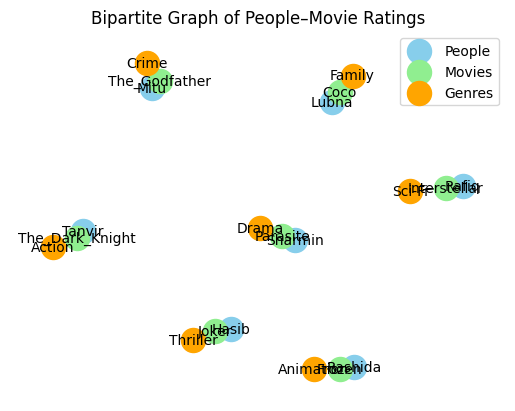

In [ ]:
# Define the layout for the graph
pos = nx.spring_layout(B, seed=42) # Use a fixed seed for reproducibility

# Draw nodes
nx.draw_networkx_nodes( B, pos, nodelist=people_nodes, node_color="skyblue",  label="People")
nx.draw_networkx_nodes(B,  pos, nodelist=movie_nodes, node_color="lightgreen",  label="Movies")
nx.draw_networkx_nodes(B,  pos, nodelist=genre_nodes, node_color="orange",  label="Genres") # Draw genre nodes

# Draw edges with labels for ratings
nx.draw_networkx_edges(B, pos)
edge_labels = nx.get_edge_attributes(B, 'weight')
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels) # Corrected function name

# Draw node labels
nx.draw_networkx_labels(B, pos, font_size=10) # Corrected function name

plotter.axis('off')
plotter.legend()
plotter.title("Bipartite Graph of People–Movie Ratings")
plotter.show()

In [ ]:
# Create person–movie rating matrix
persons = sorted(set(cluster_frame["Name"]))
movies = sorted(set(cluster_frame["Movie"]))
rating_matrix = pd.DataFrame(0, index=persons, columns=movies)

for _, row in cluster_frame.iterrows():
    rating_matrix.loc[row["Name"], row["Movie"]] = row["Rating"]
print(rating_matrix)

         Coco  Frozen  Interstellar  Joker  Parasite  The_Dark_Knight  \
Hasib       0       0             0      3         0                0   
Lubna       4       0             0      0         0                0   
Mitu        0       0             0      0         0                0   
Rafiq       0       0             4      0         0                0   
Rashida     0       4             0      0         0                0   
Sharmin     0       0             0      0         5                0   
Tanvir      0       0             0      0         0                5   

         The_Godfather  
Hasib                0  
Lubna                0  
Mitu                 5  
Rafiq                0  
Rashida              0  
Sharmin              0  
Tanvir               0  


In [ ]:
# KMeans clustering
grouping_method = KMeans(n_clusters=2, random_state=42)
clusters = grouping_method.fit_predict(rating_matrix)
cluster_map = dict(zip(persons, clusters))
print("K-Means Clustering Results:")
print(cluster_map)

K-Means Clustering Results:
{'Hasib': np.int32(0), 'Lubna': np.int32(0), 'Mitu': np.int32(0), 'Rafiq': np.int32(0), 'Rashida': np.int32(0), 'Sharmin': np.int32(0), 'Tanvir': np.int32(1)}


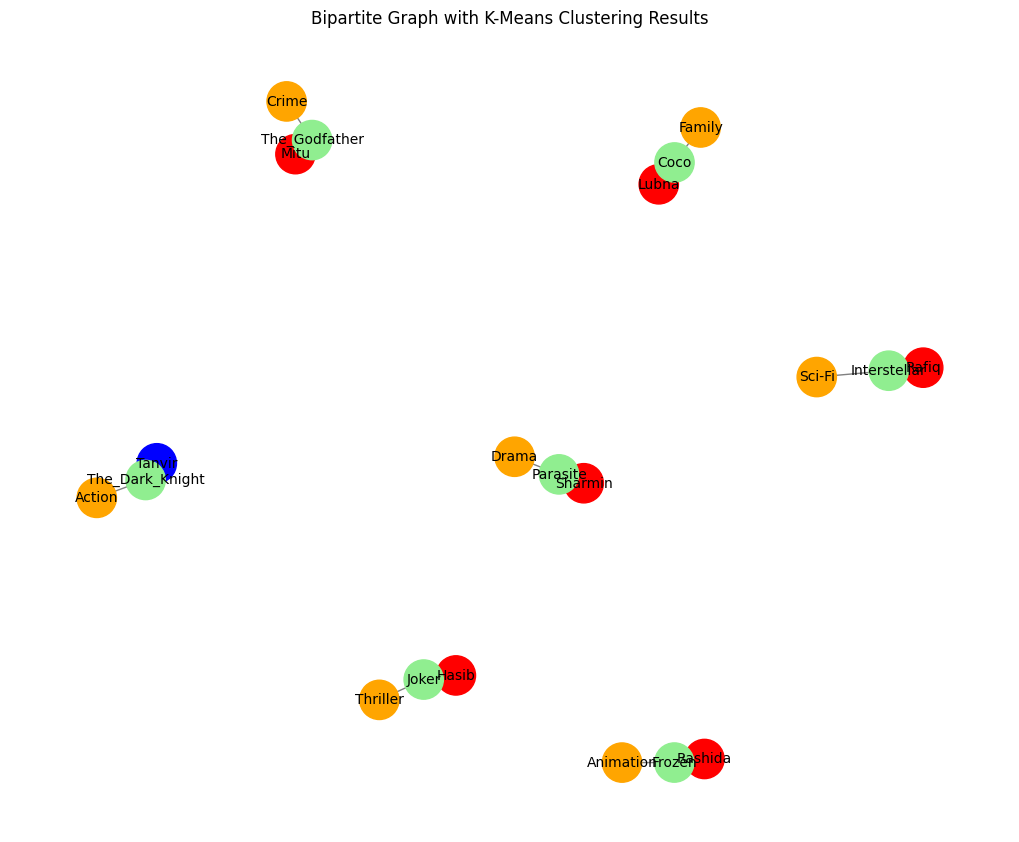

In [ ]:
# Visualization with clustering results
pos = nx.spring_layout(B, seed=42)
node_colors = []
for node in B.nodes():
    if node in cluster_map:  # person node
        node_colors.append("red" if cluster_map[node] == 0 else "blue")
    elif node in movie_nodes: # movie node
        node_colors.append("lightgreen")
    elif node in genre_nodes: # genre node
        node_colors.append("orange")
    else:
        node_colors.append("gray") # default color for other nodes

plotter.figure(figsize=(10, 8))
nx.draw(B, pos, with_labels=True, node_color=node_colors, edge_color="gray", node_size=800, font_size=10)
plotter.title("Bipartite Graph with K-Means Clustering Results")
plotter.show()

In [ ]:
from sklearn.cluster import DBSCAN

# Applotterarget_vals DBSCAN clustering
# You matarget_vals need to adjust the 'eps' and 'min_samples' parameters based on target_valsour dataset_info
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscacluster_total = dbscan.fit_predict(rating_matrix)

# Map person names to their cluster assignments
dbscan_cluster_map = dict(zip(persons, dbscacluster_total))

print("DBSCAN Clustering Results:")
print(dbscan_cluster_map)

DBSCAN Clustering Results:
{'Hasib': np.int64(-1), 'Lubna': np.int64(-1), 'Mitu': np.int64(-1), 'Rafiq': np.int64(-1), 'Rashida': np.int64(-1), 'Sharmin': np.int64(-1), 'Tanvir': np.int64(-1)}


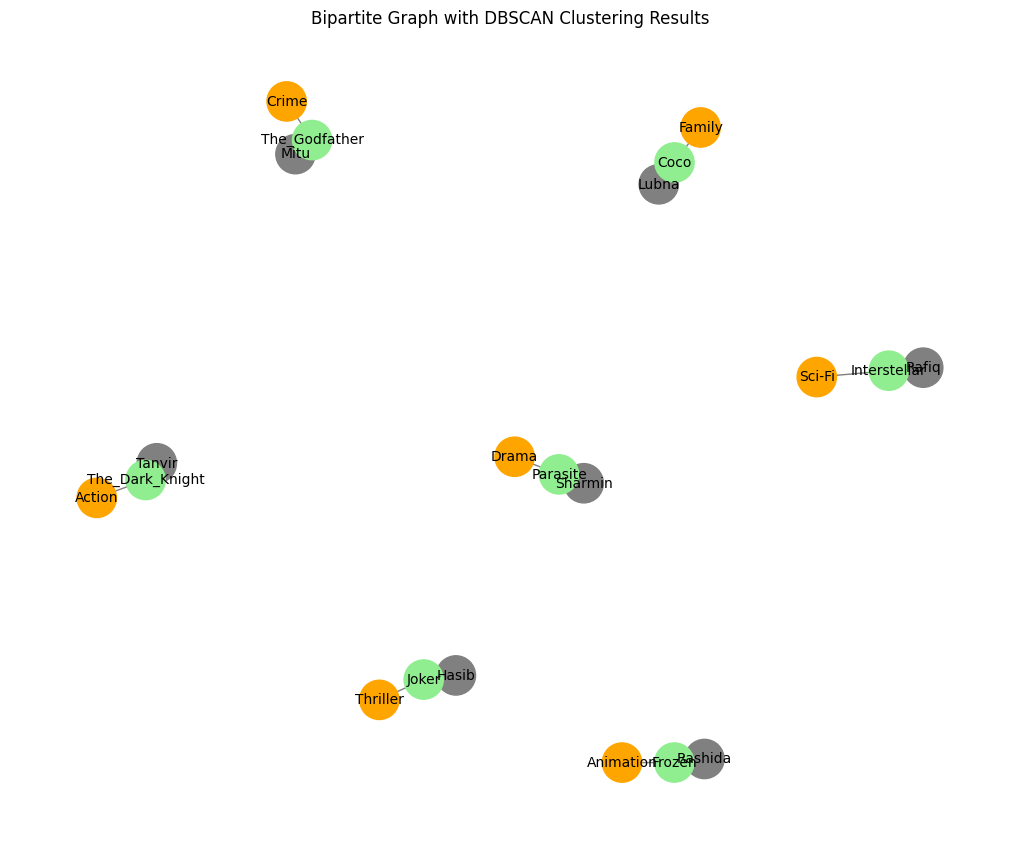

In [ ]:
# Visualization with DBSCAN clustering results
pos = nx.spring_layout(B, seed=42) # Use the same layout for consistency
node_colors = []
# Determine the number of unique clusters (excluding noise)
unique_clusters = set(dbscacluster_total)
if -1 in unique_clusters:
    num_colors = len(unique_clusters) - 1
else:
    num_colors = len(unique_clusters)

# Get a colormap
cmap = plotter.colormaps['viridis']


for node in B.nodes():
    if node in dbscan_cluster_map:  # person node
        # Assign colors based on DBSCAN cluster labels
        cluster_label = dbscan_cluster_map[node]
        if cluster_label == -1:
            node_colors.append("gray") # Noise points
        else:
            # Use the colormap to get the color for the cluster label and convert to RGBA
            node_colors.append(cmap(cluster_label / (num_colors - 1) if num_colors > 1 else 0)) # Normalize cluster label for colormap
    elif node in movie_nodes: # movie node
        node_colors.append("lightgreen")
    elif node in genre_nodes: # genre node
        node_colors.append("orange")
    else:
        node_colors.append("gray") # default color for other nodes

plotter.figure(figsize=(10, 8))
nx.draw(B, pos, with_labels=True, node_color=node_colors, edge_color="gray", node_size=800, font_size=10)
plotter.title("Bipartite Graph with DBSCAN Clustering Results")
plotter.show()